In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [3]:
data = pd.read_csv('data/student-data.csv')

In [4]:
data.head(1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,no


In [39]:
train = data.iloc[:,:-1]
target = data['passed']

In [40]:
train.head(1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,yes,no,no,4,3,4,1,1,3


In [41]:
target.head()

0     no
1     no
2    yes
3    yes
4    yes
Name: passed, dtype: object

In [42]:
# 转换表格数据
def transform_table(table):
    # 获取需要转换的列标签
    trans_columns = table.columns[table.dtypes == object]
    for column in trans_columns:
        unique = train[column].unique()
        def transform_data(item):
            return np.argwhere(item==unique)[0,0]
        table[column] = table[column].map(transform_data)

In [43]:
transform_table(train)

In [44]:
train.dtypes

school        int64
sex           int64
age           int64
address       int64
famsize       int64
Pstatus       int64
Medu          int64
Fedu          int64
Mjob          int64
Fjob          int64
reason        int64
guardian      int64
traveltime    int64
studytime     int64
failures      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
nursery       int64
higher        int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
dtype: object

In [69]:
# 数据预处理
from sklearn.preprocessing import Normalizer,MinMaxScaler,StandardScaler
# train1 = Normalizer().fit_transform(train)
# train2 = StandardScaler().fit_transform(train)
# train3 = MinMaxScaler().fit_transform(train)

In [70]:
# 数据集拆分,拆分成制定的size_arr的分组样式
from sklearn.model_selection import train_test_split

def split_train_test(train,target,size_arr):
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    for size in size_arr:
        X_train1,X_test1,y_train1,y_test1 = train_test_split(train,target,test_size=size,random_state=1)
        X_train.append(X_train1)
        X_test.append(X_test1)
        y_train.append(y_train1)
        y_test.append(y_test1)
    return (X_train,X_test,y_train,y_test)

In [71]:
def model_score(model,X_train,X_test,y_train,y_test):
    scores = []
    for i in range(len(X_train)):
        score = model.fit(X_train[i],y_train[i]).score(X_test[i],y_test[i])
        scores.append(score)
    return scores

In [72]:
def show_socres(model,feature_process,X_train,X_test,y_train,y_test,size_arr):
    model_name = model.__class__.__name__
    scores = model_score(model,X_train,X_test,y_train,y_test)
    for i in range(len(scores)):
        score = scores[i]
        bili = size_arr[i]
        print("%s 使用 %s特征处理,train/test:%.1f 评分 %f"%(model_name,feature_process,bili,score))
    print("=============================================")

In [73]:
def fit_predict_score(model,train,target,pre_feature):
    #  特征预处理
    train = pre_feature.fit_transform(train)
    # 拆分训练集和样本集
    size_arr = [0.1,0.2,0.3]
    X_train,X_test,y_train,y_test = split_train_test(train,target,size_arr)
    # 展示分数
    feature_process_name = pre_feature.__class__.__name__
    show_socres(model,feature_process_name,X_train,X_test,y_train,y_test,size_arr)

In [74]:
knn = KNeighborsClassifier()
normal = Normalizer()
minmax = MinMaxScaler()
standerd = StandardScaler()

fit_predict_score(knn,train,target,normal)
fit_predict_score(knn,train,target,minmax)
fit_predict_score(knn,train,target,standerd)

KNeighborsClassifier 使用 Normalizer特征处理,train/test:0.1 评分 0.675000
KNeighborsClassifier 使用 Normalizer特征处理,train/test:0.2 评分 0.708861
KNeighborsClassifier 使用 Normalizer特征处理,train/test:0.3 评分 0.621849
KNeighborsClassifier 使用 MinMaxScaler特征处理,train/test:0.1 评分 0.750000
KNeighborsClassifier 使用 MinMaxScaler特征处理,train/test:0.2 评分 0.658228
KNeighborsClassifier 使用 MinMaxScaler特征处理,train/test:0.3 评分 0.663866
KNeighborsClassifier 使用 StandardScaler特征处理,train/test:0.1 评分 0.725000
KNeighborsClassifier 使用 StandardScaler特征处理,train/test:0.2 评分 0.696203
KNeighborsClassifier 使用 StandardScaler特征处理,train/test:0.3 评分 0.655462


In [75]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
normal = Normalizer()
minmax = MinMaxScaler()
standerd = StandardScaler()
fit_predict_score(logistic,train,target,normal)
fit_predict_score(logistic,train,target,minmax)
fit_predict_score(logistic,train,target,standerd)

LogisticRegression 使用 Normalizer特征处理,train/test:0.1 评分 0.725000
LogisticRegression 使用 Normalizer特征处理,train/test:0.2 评分 0.696203
LogisticRegression 使用 Normalizer特征处理,train/test:0.3 评分 0.689076
LogisticRegression 使用 MinMaxScaler特征处理,train/test:0.1 评分 0.675000
LogisticRegression 使用 MinMaxScaler特征处理,train/test:0.2 评分 0.696203
LogisticRegression 使用 MinMaxScaler特征处理,train/test:0.3 评分 0.647059
LogisticRegression 使用 StandardScaler特征处理,train/test:0.1 评分 0.675000
LogisticRegression 使用 StandardScaler特征处理,train/test:0.2 评分 0.696203
LogisticRegression 使用 StandardScaler特征处理,train/test:0.3 评分 0.647059


波士顿房价预测

In [76]:
from sklearn.datasets import load_boston

In [78]:
boston = load_boston()
data = boston.data
target = boston.target
featur_names = boston.feature_names

In [79]:
train = DataFrame(data=data,columns=featur_names)

In [84]:
train1 =  Normalizer().fit_transform(train)

In [85]:
X_train,X_test,y_train,y_test = train_test_split(train,target,test_size=0.2,random_state=1)

In [88]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
y_ = knn.fit(X_train,y_train).predict(X_test)

In [89]:
from sklearn.metrics import r2_score

In [90]:
r2_score(y_test,y_)

0.5401612153026705

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline

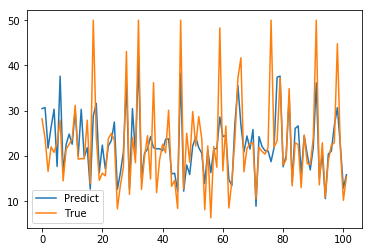

In [123]:
plt.plot(y_,label='Predict')
plt.plot(y_test,label='True')
plt.legend()

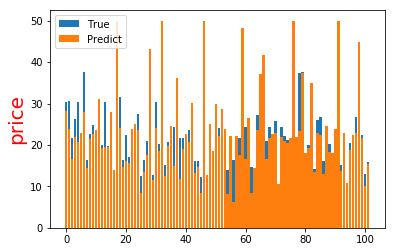

In [122]:
result = pd.concat((Series(y_),Series(y_test)),axis=1)
axes = plt.subplot(111)
axes.bar(result.index,result[0],label='True')
axes.bar(result.index,result[1],label='Predict')
axes.set_ylabel('price',fontdict={'color':'red','fontsize':20})
plt.legend()

In [133]:
def predict_model(model,train,target,size):
    X_train,X_test,y_train,y_test = train_test_split(train,target,test_size=size)
    y_ = model.fit(X_train,y_train).predict(X_test)
    print("%s score is %f"%(model.__class__.__name__,r2_score(y_test,y_)))
    print("train test 拆分比例为 %.1f"%size)
    plt.figure(figsize=(16,5))
    axes1 = plt.subplot(1,2,1)
    axes1.plot(y_,label='Predict')
    axes1.plot(y_test,label='True')
    axes1.legend()
    axes1.set_title('LinearImage')
    
    result = pd.concat((Series(y_),Series(y_test)),axis=1)
    axes2 = plt.subplot(1,2,2)
    axes2.bar(result.index,result[0],label='True')
    axes2.bar(result.index,result[1],label='Predict')
    axes2.set_ylabel('price',fontdict={'color':'red','fontsize':20})
    plt.legend()
    axes2.set_title('BarImage')

KNeighborsRegressor score is 0.373408
train test 拆分billion为 0.1


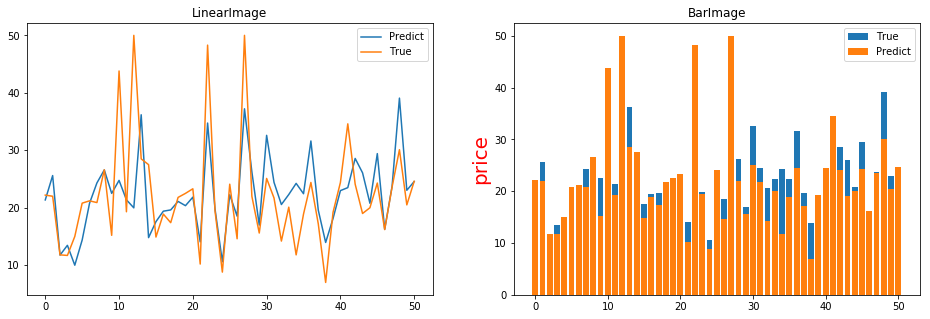

In [132]:
predict_model(knn,train,target,0.1)

KNeighborsRegressor score is 0.509310
train test 拆分比例为 0.2


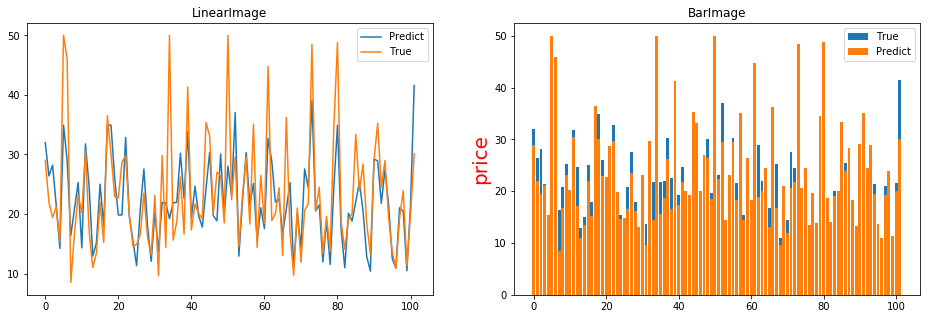

In [134]:
predict_model(knn,train,target,0.2)

KNeighborsRegressor score is 0.528626
train test 拆分比例为 0.3


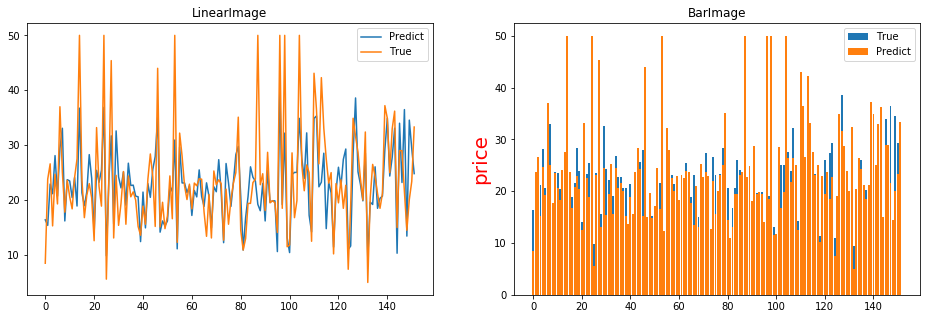

In [135]:
predict_model(knn,train,target,0.3)

In [136]:
# 回归算法
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

LinearRegression score is 0.681302
train test 拆分比例为 0.1
LinearRegression score is 0.714065
train test 拆分比例为 0.2
LinearRegression score is 0.722768
train test 拆分比例为 0.3


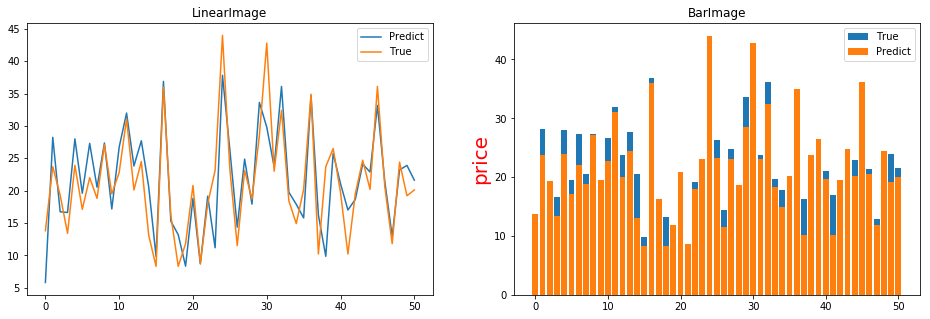

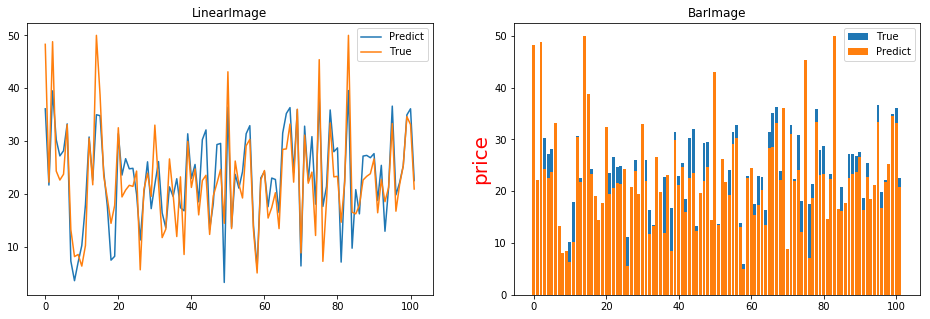

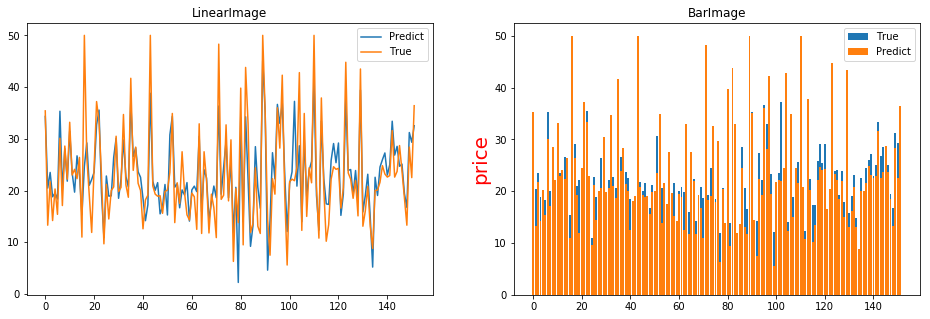

In [137]:
linear = LinearRegression()
arr_size = [0.1,0.2,0.3]
for i in arr_size:
    predict_model(linear,train,target,i)

Ridge score is 0.613562
train test 拆分比例为 0.1
Ridge score is 0.696656
train test 拆分比例为 0.2
Ridge score is 0.641949
train test 拆分比例为 0.3


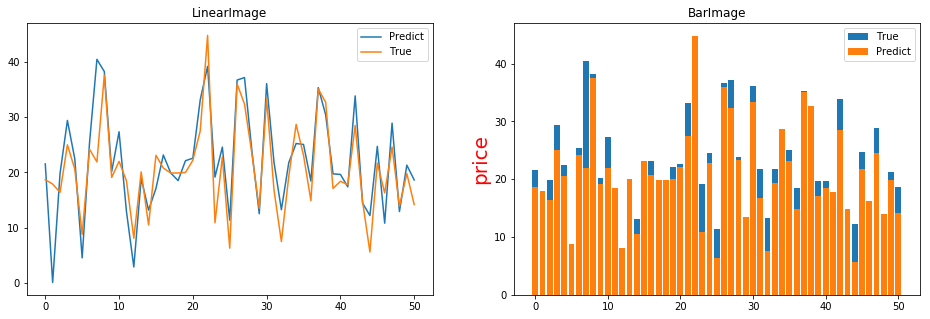

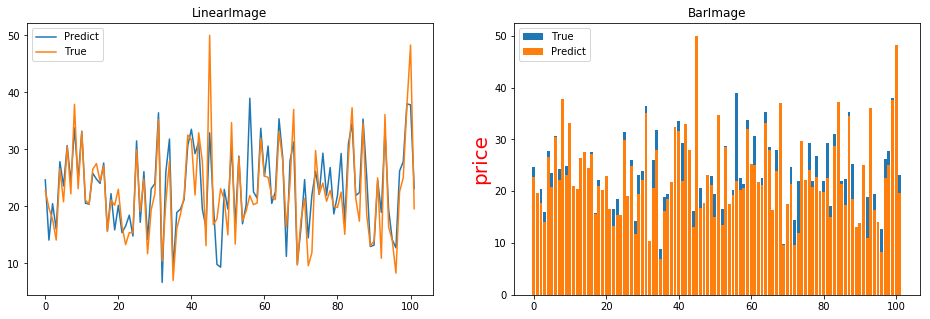

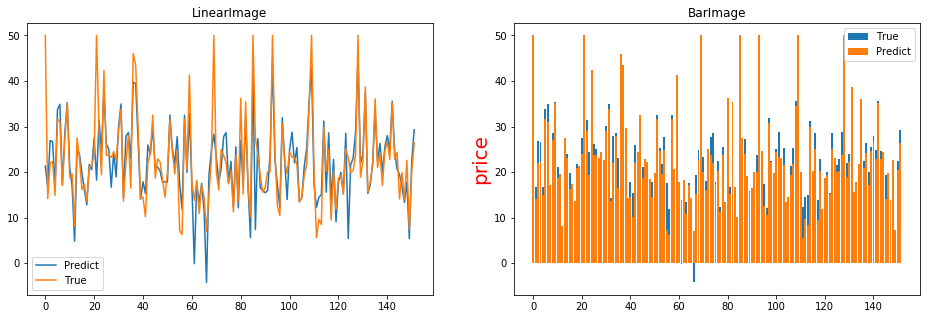

In [143]:
linear = Ridge(alpha=0)
arr_size = [0.1,0.2,0.3]
for i in arr_size:
    predict_model(linear,train,target,i)

Lasso score is 0.631442
train test 拆分比例为 0.1
Lasso score is 0.687308
train test 拆分比例为 0.2
Lasso score is 0.698630
train test 拆分比例为 0.3


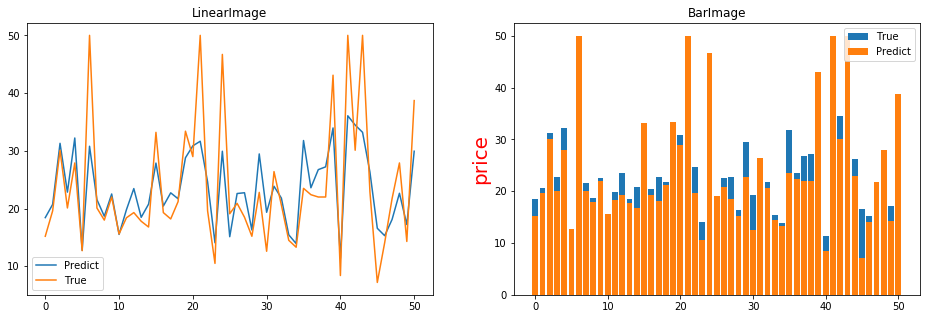

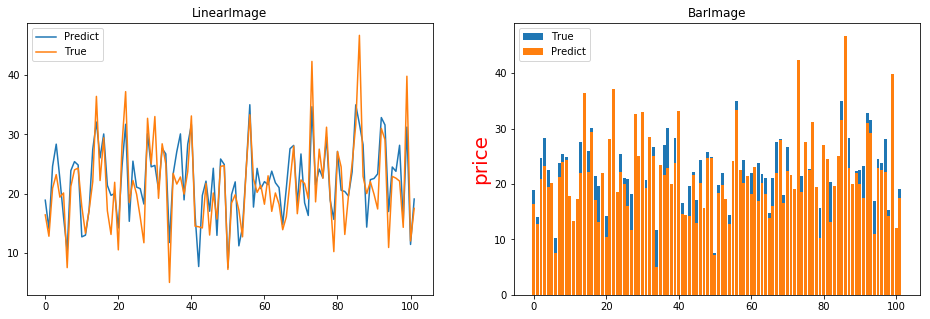

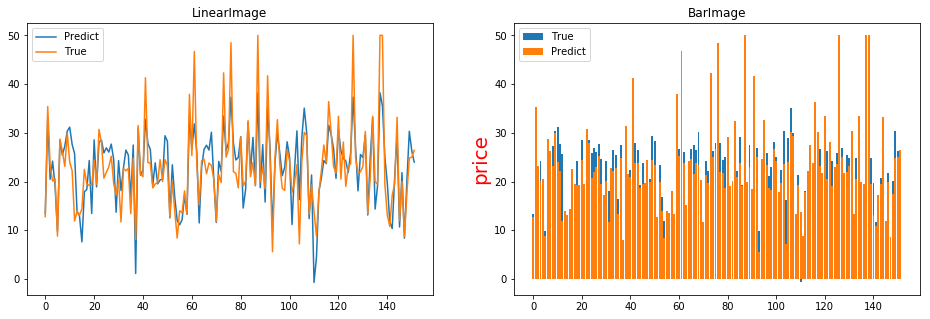

In [139]:
linear = Lasso()
arr_size = [0.1,0.2,0.3]
for i in arr_size:
    predict_model(linear,train,target,i)

DecisionTreeRegressor score is 0.894001
train test 拆分比例为 0.1
DecisionTreeRegressor score is 0.819007
train test 拆分比例为 0.2
DecisionTreeRegressor score is 0.642262
train test 拆分比例为 0.3


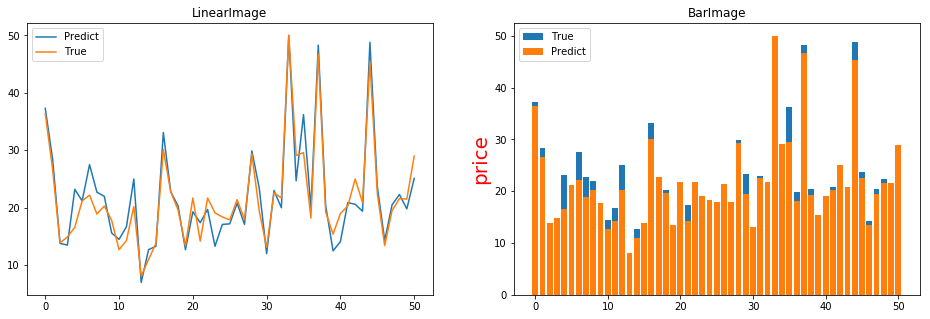

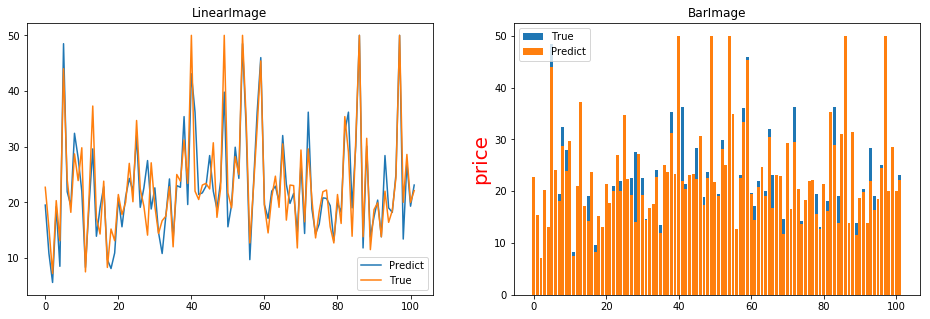

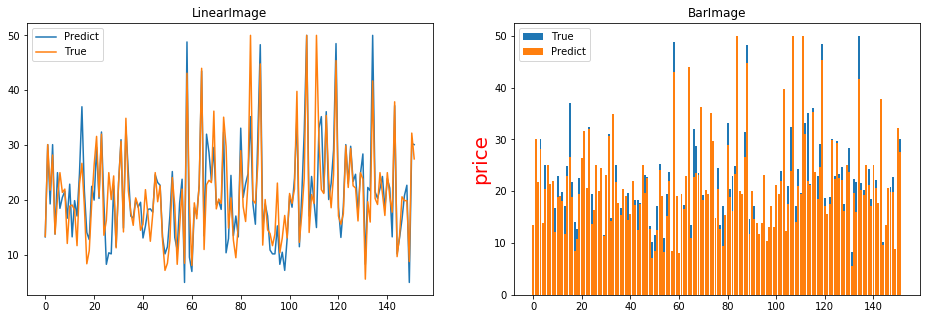

In [140]:
linear = DecisionTreeRegressor()
arr_size = [0.1,0.2,0.3]
for i in arr_size:
    predict_model(linear,train,target,i)

SVR score is 0.830275
train test 拆分比例为 0.1
SVR score is 0.743100
train test 拆分比例为 0.2
SVR score is 0.716412
train test 拆分比例为 0.3


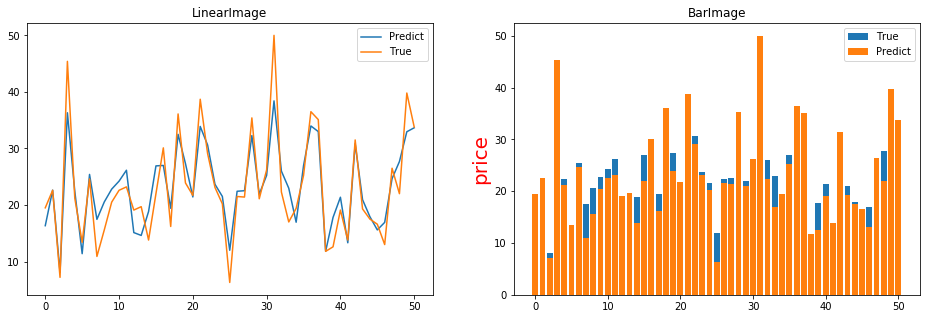

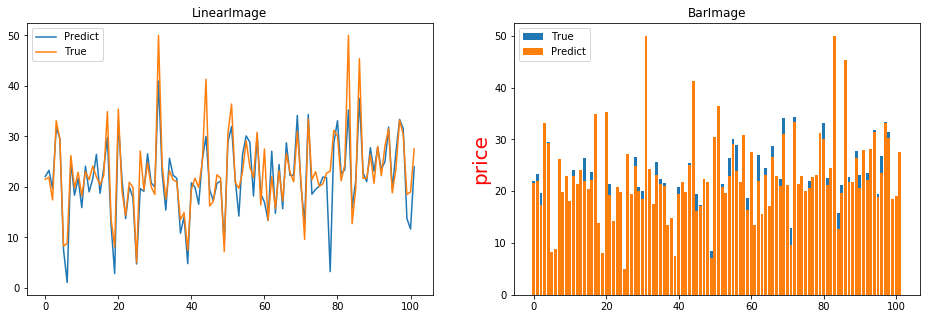

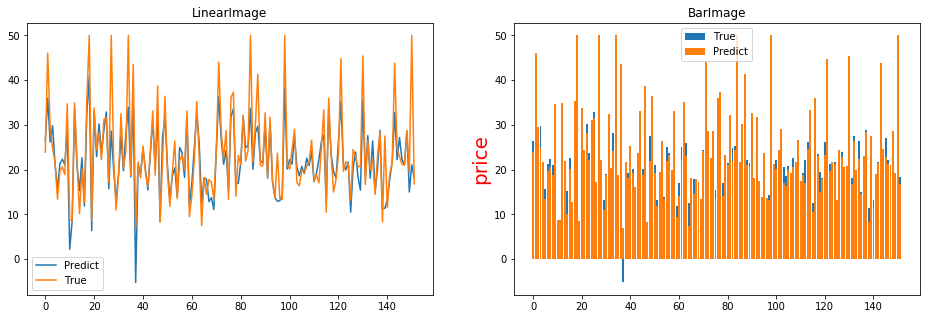

In [142]:
linear = SVR(kernel='linear')
arr_size = [0.1,0.2,0.3]
for i in arr_size:
    predict_model(linear,train,target,i)

鲍鱼年龄

In [149]:
data = pd.read_table('data/abalone.txt',header=None)
train = data.iloc[:,:-1]
target = data[8]

In [152]:
train.shape

(4177, 8)

In [160]:
X_train,X_test,y_train,y_test = train_test_split(train,target)

In [151]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [161]:
linear = LinearRegression()
y_ = linear.fit(X_train,y_train).predict(X_test)
r2_score(y_test,y_)

0.5281088588415888

In [176]:
svr = SVR(C=10000)
y_ = svr.fit(X_train,y_train).predict(X_test)
r2_score(y_test,y_)

0.5691115151189277

In [185]:
tree = DecisionTreeRegressor(max_depth=6)
y_ = tree.fit(X_train,y_train).predict(X_test)
r2_score(y_test,y_)

0.49351951320826093

In [192]:
knn = KNeighborsRegressor(n_neighbors=17)
y_ = knn.fit(X_train,y_train).predict(X_test)
r2_score(y_test,y_)

0.5396193331408519

In [193]:
svr = SVR(C=10000)
y_ = svr.fit(X_train,y_train).predict(X_test)
r2_score(y_test,y_)

0.5691115151189277

In [208]:
# 预测一个特征对鲍鱼年龄的影响
train2 = train[2].copy().values.reshape(-1,1)

In [209]:
train2

array([[0.365],
       [0.265],
       [0.42 ],
       ...,
       [0.475],
       [0.485],
       [0.555]])

In [210]:
X_train,X_test,y_train,y_test = train_test_split(train2,target,test_size=0.2)

In [218]:
svr = SVR(C=10000,kernel='linear')
svr.fit(X_train,y_train)

SVR(C=10000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [219]:
y_ = svr.predict(X_test)
r2_score(y_test,y_)

0.25944905715103217

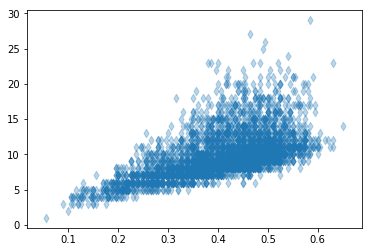

In [220]:
plt.scatter(X_train,y_train,alpha=0.3,marker='d')

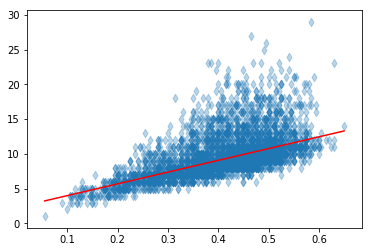

In [226]:
x_test = np.linspace(X_train.min(),X_train.max(),100).reshape(-1,1)
y_ = svr.predict(x_test)
plt.plot(x_test,y_,color='red')
plt.scatter(X_train,y_train,alpha=0.3,marker='d')